## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.514067  1.174020  0.349685 -0.788061  1.669879  0.046705
1  0.708442 -0.678921 -1.739899 -1.327730 -1.477506 -0.354409
2 -0.088924  0.851719  0.748660  1.032642 -1.128978  0.836436
3 -0.814190  1.079975  0.421708  0.905547 -0.457772  0.333261
4 -0.789987  0.998556  0.310907  0.761289  0.397766  0.419502


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9899655	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.9787782	total: 70.3ms	remaining: 35.1s
2:	learn: 0.9675540	total: 70.9ms	remaining: 23.6s
3:	learn: 0.9581584	total: 71.4ms	remaining: 17.8s
4:	learn: 0.9480574	total: 72ms	remaining: 14.3s
5:	learn: 0.9385721	total: 72.5ms	remaining: 12s
6:	learn: 0.9287474	total: 73.1ms	remaining: 10.4s
7:	learn: 0.9202712	total: 73.6ms	remaining: 9.13s
8:	learn: 0.9113516	total: 74.1ms	remaining: 8.15s
9:	learn: 0.9034447	total: 74.7ms	remaining: 7.39s
10:	learn: 0.8944490	total: 75.2ms	remaining: 6.76s
11:	learn: 0.8837670	total: 75.8ms	remaining: 6.24s
12:	learn: 0.8747109	total: 76.3ms	remaining: 5.79s
13:	learn: 0.8668416	total: 76.7ms	remaining: 5.41s
14:	learn: 0.8577342	total: 77.3ms	remaining: 5.08s
15:	learn: 0.8501111	total: 77.8ms	remaining: 4.78s
16:	learn: 0.8422186	total: 78.3ms	remaining: 4.53s
17:	learn: 0.8349350	total: 78.7ms	remaining: 4.29s
18:	learn: 0.8267800	total: 79.3ms	remaining: 4.

81:	learn: 0.4799998	total: 109ms	remaining: 1.23s
82:	learn: 0.4761881	total: 110ms	remaining: 1.22s
83:	learn: 0.4719829	total: 111ms	remaining: 1.21s
84:	learn: 0.4683667	total: 111ms	remaining: 1.2s
85:	learn: 0.4643104	total: 111ms	remaining: 1.18s
86:	learn: 0.4611785	total: 112ms	remaining: 1.17s
87:	learn: 0.4571186	total: 112ms	remaining: 1.16s
88:	learn: 0.4541632	total: 113ms	remaining: 1.16s
89:	learn: 0.4505841	total: 113ms	remaining: 1.15s
90:	learn: 0.4484983	total: 114ms	remaining: 1.14s
91:	learn: 0.4444523	total: 114ms	remaining: 1.13s
92:	learn: 0.4411810	total: 115ms	remaining: 1.12s
93:	learn: 0.4377576	total: 115ms	remaining: 1.11s
94:	learn: 0.4338175	total: 116ms	remaining: 1.1s
95:	learn: 0.4310793	total: 116ms	remaining: 1.09s
96:	learn: 0.4281518	total: 117ms	remaining: 1.08s
97:	learn: 0.4249562	total: 117ms	remaining: 1.07s
98:	learn: 0.4218050	total: 117ms	remaining: 1.07s
99:	learn: 0.4181418	total: 118ms	remaining: 1.06s
100:	learn: 0.4155921	total: 118m

240:	learn: 0.1597460	total: 188ms	remaining: 592ms
241:	learn: 0.1584647	total: 189ms	remaining: 590ms
242:	learn: 0.1573946	total: 189ms	remaining: 588ms
243:	learn: 0.1562052	total: 189ms	remaining: 587ms
244:	learn: 0.1551732	total: 190ms	remaining: 585ms
245:	learn: 0.1539476	total: 190ms	remaining: 584ms
246:	learn: 0.1528273	total: 191ms	remaining: 582ms
247:	learn: 0.1519115	total: 191ms	remaining: 580ms
248:	learn: 0.1509309	total: 192ms	remaining: 579ms
249:	learn: 0.1500361	total: 192ms	remaining: 577ms
250:	learn: 0.1491627	total: 193ms	remaining: 576ms
251:	learn: 0.1482570	total: 194ms	remaining: 575ms
252:	learn: 0.1472244	total: 194ms	remaining: 573ms
253:	learn: 0.1463963	total: 195ms	remaining: 571ms
254:	learn: 0.1455642	total: 196ms	remaining: 572ms
255:	learn: 0.1445337	total: 196ms	remaining: 570ms
256:	learn: 0.1435067	total: 197ms	remaining: 569ms
257:	learn: 0.1428637	total: 197ms	remaining: 567ms
258:	learn: 0.1420032	total: 198ms	remaining: 565ms
259:	learn: 

457:	learn: 0.0482483	total: 293ms	remaining: 347ms
458:	learn: 0.0480533	total: 294ms	remaining: 347ms
459:	learn: 0.0477527	total: 295ms	remaining: 346ms
460:	learn: 0.0474779	total: 295ms	remaining: 345ms
461:	learn: 0.0472080	total: 295ms	remaining: 344ms
462:	learn: 0.0469429	total: 296ms	remaining: 343ms
463:	learn: 0.0468435	total: 296ms	remaining: 342ms
464:	learn: 0.0467454	total: 297ms	remaining: 341ms
465:	learn: 0.0464869	total: 297ms	remaining: 341ms
466:	learn: 0.0462130	total: 298ms	remaining: 340ms
467:	learn: 0.0460817	total: 298ms	remaining: 339ms
468:	learn: 0.0458299	total: 299ms	remaining: 338ms
469:	learn: 0.0457015	total: 299ms	remaining: 337ms
470:	learn: 0.0454546	total: 299ms	remaining: 336ms
471:	learn: 0.0452121	total: 300ms	remaining: 336ms
472:	learn: 0.0449740	total: 300ms	remaining: 335ms
473:	learn: 0.0447402	total: 301ms	remaining: 334ms
474:	learn: 0.0445106	total: 301ms	remaining: 333ms
475:	learn: 0.0442851	total: 302ms	remaining: 332ms
476:	learn: 

629:	learn: 0.0253612	total: 372ms	remaining: 218ms
630:	learn: 0.0252278	total: 372ms	remaining: 218ms
631:	learn: 0.0251939	total: 373ms	remaining: 217ms
632:	learn: 0.0251067	total: 373ms	remaining: 216ms
633:	learn: 0.0250600	total: 373ms	remaining: 215ms
634:	learn: 0.0250268	total: 373ms	remaining: 215ms
635:	learn: 0.0249033	total: 374ms	remaining: 214ms
636:	learn: 0.0248183	total: 374ms	remaining: 213ms
637:	learn: 0.0247725	total: 375ms	remaining: 213ms
638:	learn: 0.0247277	total: 375ms	remaining: 212ms
639:	learn: 0.0246952	total: 375ms	remaining: 211ms
640:	learn: 0.0245730	total: 376ms	remaining: 211ms
641:	learn: 0.0244631	total: 376ms	remaining: 210ms
642:	learn: 0.0243433	total: 377ms	remaining: 209ms
643:	learn: 0.0243122	total: 377ms	remaining: 208ms
644:	learn: 0.0242303	total: 378ms	remaining: 208ms
645:	learn: 0.0241871	total: 378ms	remaining: 207ms
646:	learn: 0.0241566	total: 378ms	remaining: 206ms
647:	learn: 0.0239941	total: 379ms	remaining: 206ms
648:	learn: 

864:	learn: 0.0110214	total: 476ms	remaining: 74.3ms
865:	learn: 0.0109934	total: 477ms	remaining: 73.8ms
866:	learn: 0.0109552	total: 477ms	remaining: 73.2ms
867:	learn: 0.0109276	total: 477ms	remaining: 72.6ms
868:	learn: 0.0108728	total: 478ms	remaining: 72ms
869:	learn: 0.0108140	total: 478ms	remaining: 71.5ms
870:	learn: 0.0107870	total: 479ms	remaining: 70.9ms
871:	learn: 0.0107339	total: 479ms	remaining: 70.4ms
872:	learn: 0.0106948	total: 480ms	remaining: 69.8ms
873:	learn: 0.0106566	total: 480ms	remaining: 69.3ms
874:	learn: 0.0106100	total: 481ms	remaining: 68.7ms
875:	learn: 0.0105653	total: 482ms	remaining: 68.2ms
876:	learn: 0.0105280	total: 482ms	remaining: 67.6ms
877:	learn: 0.0104823	total: 482ms	remaining: 67ms
878:	learn: 0.0104386	total: 483ms	remaining: 66.4ms
879:	learn: 0.0104021	total: 483ms	remaining: 65.9ms
880:	learn: 0.0103819	total: 483ms	remaining: 65.3ms
881:	learn: 0.0103536	total: 484ms	remaining: 64.7ms
882:	learn: 0.0103183	total: 484ms	remaining: 64.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

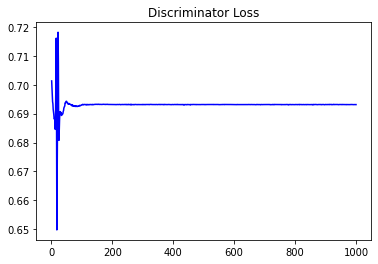

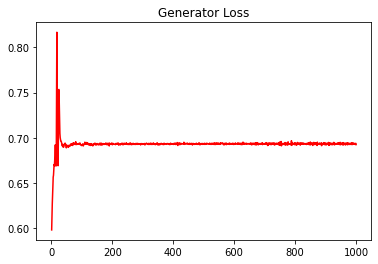

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14036295830315065


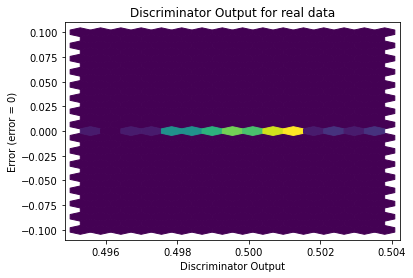

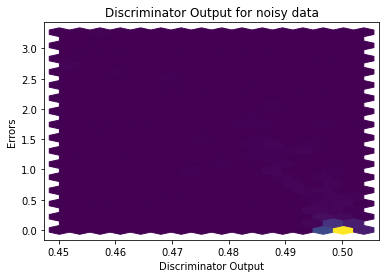

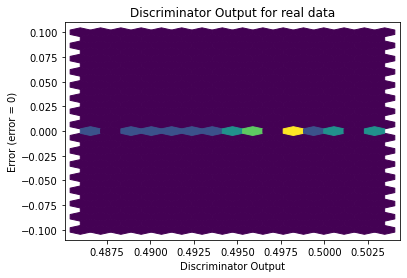

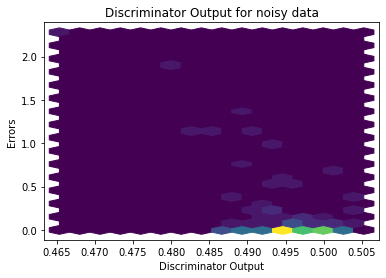

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


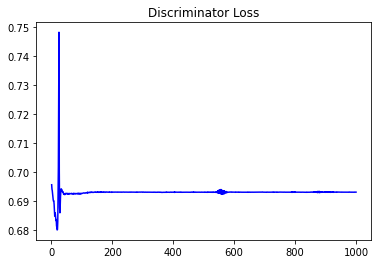

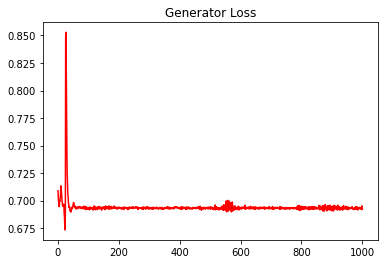

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17533492599902525


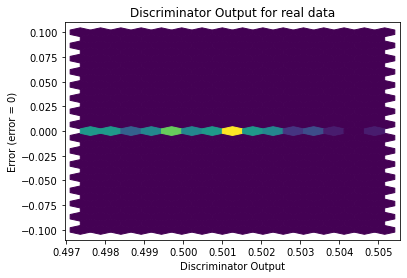

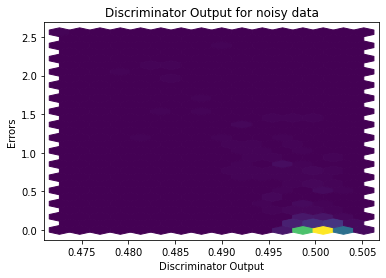

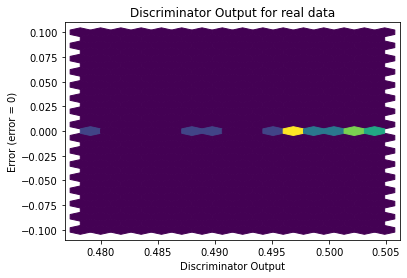

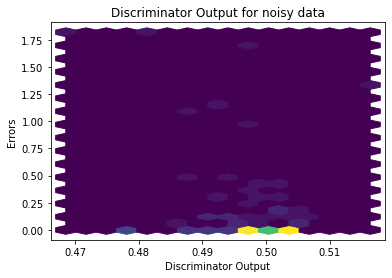

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3780]], requires_grad=True)
